In [1]:
import pandas as pd

df = pd.read_csv("Nova_final_dataset_3.csv")
print(df.shape)
df.head()
df.info()

(11945, 63)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11945 entries, 0 to 11944
Data columns (total 63 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ENERGY_KCAL                          11945 non-null  float64
 1   PROTEIN_G                            11945 non-null  float64
 2   CARBOHYDRATE_G                       11945 non-null  float64
 3   SUGARS_TOTALG                        11945 non-null  float64
 4   FIBER_TOTAL_DIETARY_G                11945 non-null  float64
 5   TOTAL_FAT_G                          11945 non-null  float64
 6   FATTY_ACIDS_TOTAL_SATURATED_G        11945 non-null  float64
 7   SODIUM_MG                            11945 non-null  float64
 8   MAIN_FOOD_DESCRIPTION                11913 non-null  object 
 9   WWEIA_CATEGORY_DESCRIPTION           11944 non-null  object 
 10  FOOD_CODE                            3099 non-null   float64
 11  FATTY_ACIDS_TOTA

In [2]:
df['NOVA_GROUP'].value_counts()

NOVA_GROUP
4.0    7369
3.0    2826
1.0    1290
2.0     460
Name: count, dtype: int64

In [3]:
df.isna().sum().sort_values(ascending=False)

VITAMIN_B_12_ADDEDMCG    8846
NIACIN_MG                8846
FOLIC_ACID_MCG           8846
FOLATE_FOOD_MCG          8846
FOLATE_DFE_MCG_DFE       8846
                         ... 
VITAMIN_D_D2_D3_MCG         0
CALCIUM_MG                  0
MAGNESIUM_MG                0
IRONMG                      0
NOVA_GROUP                  0
Length: 63, dtype: int64

In [4]:
df.fillna(0, inplace=True)

In [5]:
df.isna().sum().sort_values(ascending=False).head(10)

ENERGY_KCAL                      0
ALCOHOL_G                        0
VITAMIN_E_ALPHA_TOCOPHEROL_MG    0
VITAMIN_E_ADDEDMG                0
VITAMIN_K_PHYLLOQUINONE_MCG      0
CALCIUM_MG                       0
PHOSPHORUS_MG                    0
MAGNESIUM_MG                     0
IRONMG                           0
ZINCMG                           0
dtype: int64

In [6]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
continuous_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

print("Categorical columns:", categorical_cols)
print("Continuous columns:", continuous_cols)

Categorical columns: ['MAIN_FOOD_DESCRIPTION', 'WWEIA_CATEGORY_DESCRIPTION']
Continuous columns: ['ENERGY_KCAL', 'PROTEIN_G', 'CARBOHYDRATE_G', 'SUGARS_TOTALG', 'FIBER_TOTAL_DIETARY_G', 'TOTAL_FAT_G', 'FATTY_ACIDS_TOTAL_SATURATED_G', 'SODIUM_MG', 'FOOD_CODE', 'FATTY_ACIDS_TOTAL_MONOUNSATURATED_G', 'FATTY_ACIDS_TOTAL_POLYUNSATURATED_G', 'CHOLESTEROL_MG', 'RETINOL_MCG', 'VITAMIN_A_RAE_MCG_RAE', 'CAROTENE_ALPHA_MCG', 'CAROTENE_BETA_MCG', 'CRYPTOXANTHIN_BETA_MCG', 'LYCOPENE_MCG', 'LUTEIN_ZEAXANTHIN_MCG', 'THIAMIN_MG', 'RIBOFLAVIN_MG', 'NIACIN_MG', 'VITAMIN_B_6_MG', 'FOLIC_ACID_MCG', 'FOLATE_FOOD_MCG', 'FOLATE_DFE_MCG_DFE', 'FOLATE_TOTAL_MCG', 'CHOLINE_TOTAL_MG', 'VITAMIN_B_12_MCG', 'VITAMIN_B_12_ADDEDMCG', 'VITAMIN_C_MG', 'VITAMIN_D_D2_D3_MCG', 'VITAMIN_E_ALPHA_TOCOPHEROL_MG', 'VITAMIN_E_ADDEDMG', 'VITAMIN_K_PHYLLOQUINONE_MCG', 'CALCIUM_MG', 'PHOSPHORUS_MG', 'MAGNESIUM_MG', 'IRONMG', 'ZINCMG', 'COPPER_MG', 'SELENIUM_MCG', 'POTASSIUM_MG', 'CAFFEINE_MG', 'THEOBROMINE_MG', 'ALCOHOL_G', '4_0G'

In [7]:
X = df[continuous_cols].copy()
X.drop(columns=['FOOD_CODE','NOVA_GROUP','MAIN_FOOD_DESCRIPTION', 'WWEIA_CATEGORY_DESCRIPTION'], inplace=True, errors='ignore')  # keep only nutrients
y = df['NOVA_GROUP']

In [8]:
print(X.shape)
print(y.value_counts())

(11945, 59)
NOVA_GROUP
4.0    7369
3.0    2826
1.0    1290
2.0     460
Name: count, dtype: int64


In [10]:
import numpy as np

import numpy as np

X_log = np.log1p(X)    # same as log(1 + x)
X_log.head()

,ENERGY_KCAL,PROTEIN_G,CARBOHYDRATE_G,SUGARS_TOTALG,FIBER_TOTAL_DIETARY_G,TOTAL_FAT_G,FATTY_ACIDS_TOTAL_SATURATED_G,SODIUM_MG,FATTY_ACIDS_TOTAL_MONOUNSATURATED_G,FATTY_ACIDS_TOTAL_POLYUNSATURATED_G,...,12_0G,14_0G,16_0G,18_0G,20_1G,22_1G,20_5_N_3G,22_5_N_3G,22_6_N_3G,WATERG
0,3.970292,1.465568,1.763017,1.771557,0.0,1.144223,0.810486,3.688879,0.377066,0.067659,...,0.062975,0.185649,0.454890,0.188966,0.001998,0.0,0.000,0.001000,0.0,4.498920
1,4.127134,1.451614,1.728109,1.759581,0.0,1.435085,1.050822,3.663562,0.523544,0.102557,...,0.092579,0.264669,0.618962,0.269263,0.003992,0.0,0.001,0.001998,0.0,4.489759
2,3.931826,1.472472,1.774952,1.773256,0.0,1.064711,0.746688,3.688879,0.336472,0.056380,...,0.056380,0.166362,0.413433,0.168899,0.001998,0.0,0.000,0.001000,0.0,4.500920
3,3.784190,1.477049,1.821318,1.785070,0.0,0.667829,0.449801,3.688879,0.190620,0.031499,...,0.025668,0.088926,0.235072,0.091667,0.001000,0.0,0.000,0.000000,0.0,4.507557
4,3.555348,1.488400,1.778336,1.800058,0.0,0.076961,0.047837,3.737670,0.016857,0.005982,...,0.001998,0.007968,0.020783,0.008960,0.000000,0.0,0.000,0.000000,0.0,4.519612


In [11]:
df['NOVA_GROUP'].value_counts()

NOVA_GROUP
4.0    7369
3.0    2826
1.0    1290
2.0     460
Name: count, dtype: int64

In [12]:
df['NOVA_GROUP'].value_counts(normalize=True)

NOVA_GROUP
4.0    0.616911
3.0    0.236584
1.0    0.107995
2.0    0.038510
Name: proportion, dtype: float64

training random forest model with 59 features without 5 fold cv

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(
    X_log, y, test_size=0.2, stratify=y, random_state=42
)

rf = RandomForestClassifier(
    n_estimators=500,
    random_state=42,
    class_weight=None
)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.81      0.69      0.75       258
         2.0       0.89      0.74      0.81        92
         3.0       0.75      0.61      0.67       565
         4.0       0.84      0.93      0.88      1474

    accuracy                           0.82      2389
   macro avg       0.82      0.74      0.78      2389
weighted avg       0.82      0.82      0.82      2389



In [14]:
rf2 = RandomForestClassifier(
    n_estimators=500,
    random_state=42,
    class_weight='balanced'
)
rf2.fit(X_train, y_train)
y_pred = rf2.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.81      0.69      0.74       258
         2.0       0.61      0.79      0.69        92
         3.0       0.77      0.59      0.66       565
         4.0       0.84      0.92      0.88      1474

    accuracy                           0.81      2389
   macro avg       0.76      0.75      0.74      2389
weighted avg       0.81      0.81      0.81      2389



In [15]:

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

rf.fit(X_res, y_res)
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.74      0.74      0.74       258
         2.0       0.58      0.83      0.68        92
         3.0       0.69      0.72      0.70       565
         4.0       0.89      0.85      0.87      1474

    accuracy                           0.81      2389
   macro avg       0.73      0.78      0.75      2389
weighted avg       0.81      0.81      0.81      2389



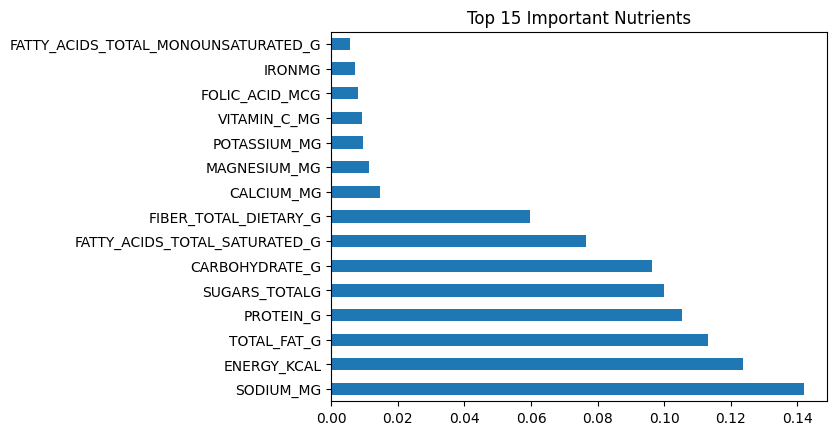

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

feature_importance = pd.Series(rf.feature_importances_, index=X.columns)
feature_importance.nlargest(15).plot(kind='barh', title="Top 15 Important Nutrients")
plt.show()


In [17]:
import pandas as pd
import numpy as np

# Predicted probabilities
probs = rf.predict_proba(X_test)

# Predicted classes
pred_nova = rf.predict(X_test)

# Create DataFrame
probs_df = pd.DataFrame(probs, columns=['Prob_NOVA1', 'Prob_NOVA2', 'Prob_NOVA3', 'Prob_NOVA4'])
probs_df['Pred_NOVA'] = pred_nova
probs_df['True_NOVA'] = y_test.values

# Optional: compute FPro score (continuous)
probs_df['FPro'] = (1 - probs_df['Prob_NOVA1'] + probs_df['Prob_NOVA4']) / 2

probs_df.head(10)


,Prob_NOVA1,Prob_NOVA2,Prob_NOVA3,Prob_NOVA4,Pred_NOVA,True_NOVA,FPro
0,0.008000,0.000000,0.004000,0.988000,4.0,4.0,0.990000
1,0.309237,0.555293,0.058104,0.077365,2.0,2.0,0.384064
2,0.000000,0.000000,0.008000,0.992000,4.0,4.0,0.996000
3,0.004000,0.016000,0.048000,0.932000,4.0,4.0,0.964000
4,0.000000,0.996000,0.000000,0.004000,2.0,2.0,0.502000
5,0.018000,0.000000,0.446000,0.536000,4.0,4.0,0.759000
6,0.000000,0.000000,0.004000,0.996000,4.0,4.0,0.998000
7,0.000000,1.000000,0.000000,0.000000,2.0,2.0,0.500000
8,0.160000,0.016000,0.732000,0.092000,3.0,4.0,0.466000
9,0.247000,0.000000,0.586200,0.166800,3.0,3.0,0.459900


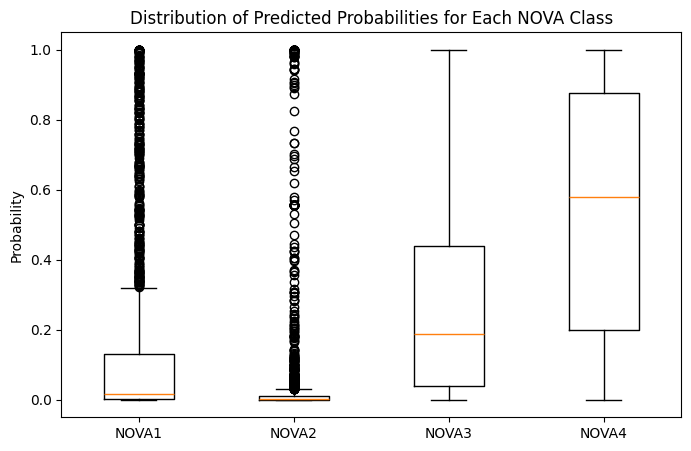

In [18]:
# Sort by predicted class probability
sorted_df = probs_df.sort_values(by='Pred_NOVA', ascending=True)

# Or plot class probability distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.boxplot([probs[:,0], probs[:,1], probs[:,2], probs[:,3]],
            tick_labels=['NOVA1','NOVA2','NOVA3','NOVA4'])
plt.title("Distribution of Predicted Probabilities for Each NOVA Class")
plt.ylabel("Probability")
plt.show()


In [19]:
sample = probs_df.sample(10, random_state=42)
print(sample[['True_NOVA', 'Pred_NOVA', 'Prob_NOVA1', 'Prob_NOVA2', 'Prob_NOVA3', 'Prob_NOVA4', 'FPro']])

      True_NOVA  Pred_NOVA  Prob_NOVA1  Prob_NOVA2  Prob_NOVA3  Prob_NOVA4  \
1320        1.0        1.0    0.881506    0.000082    0.000000    0.118412   
1412        3.0        3.0    0.028000    0.012000    0.545500    0.414500   
530         3.0        3.0    0.016000    0.000000    0.546000    0.438000   
554         4.0        4.0    0.050000    0.010000    0.233000    0.707000   
229         4.0        4.0    0.000000    0.000000    0.006000    0.994000   
472         1.0        1.0    0.978000    0.002000    0.000000    0.020000   
282         4.0        4.0    0.000000    0.002000    0.038000    0.960000   
1783        4.0        4.0    0.000000    0.000000    0.002000    0.998000   
2198        4.0        2.0    0.309237    0.555293    0.058104    0.077365   
2089        4.0        4.0    0.002000    0.004000    0.064000    0.930000   

          FPro  
1320  0.118453  
1412  0.693250  
530   0.711000  
554   0.828500  
229   0.997000  
472   0.021000  
282   0.980000  
1783 

RETRAINING WITH SMOTE AND CV

In [20]:
# ---------------------------------------
# 📦 Imports
# ---------------------------------------
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
from scipy.stats import randint
import warnings
warnings.filterwarnings('ignore')

# ---------------------------------------
# 🧠 1️⃣ Train-Test Split (stratified)
# ---------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_log, y, test_size=0.2, stratify=y, random_state=42
)

print("Class distribution (before SMOTE):")
print(y_train.value_counts(normalize=True))

# ---------------------------------------
# ⚖️ 2️⃣ Apply SMOTE only on training data
# ---------------------------------------
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("\nClass distribution (after SMOTE):")
print(y_train_res.value_counts(normalize=True))

# ---------------------------------------
# 🌲 3️⃣ Define model with class_weight balancing
# ---------------------------------------
rf = RandomForestClassifier(
    class_weight='balanced_subsample',
    random_state=42
)

param_dist = {
    'n_estimators': randint(300, 1000),
    'max_depth': [10, 20, 30, None],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Stratified 5-fold CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# ---------------------------------------
# 🔍 4️⃣ RandomizedSearchCV
# ---------------------------------------
search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=20,
    scoring='f1_macro',
    cv=cv,
    random_state=42,
    verbose=2,
    n_jobs=-1
)

search.fit(X_train_res, y_train_res)

best_rf_balanced = search.best_estimator_

print("\nBest parameters:", search.best_params_)
print("Best CV macro F1:", search.best_score_)

# ---------------------------------------
# 🧾 5️⃣ Evaluate on test set
# ---------------------------------------
y_pred = best_rf_balanced.predict(X_test)
probs = best_rf_balanced.predict_proba(X_test)
report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", report)

# ---------------------------------------
# 📈 6️⃣ AUC (per-class + macro)
# ---------------------------------------
y_test_bin = pd.get_dummies(y_test)
auc_scores = {}
for i, cls in enumerate(y_test_bin.columns):
    auc = roc_auc_score(y_test_bin[cls], probs[:, i])
    auc_scores[cls] = auc
macro_auc = np.mean(list(auc_scores.values()))

print("\nAUC per class:", auc_scores)
print("Macro AUC:", macro_auc)

# ---------------------------------------
# 🔍 7️⃣ Predicted class distribution
# ---------------------------------------
pred_dist = pd.Series(y_pred).value_counts(normalize=True)
print("\nPredicted class proportions:")
print(pred_dist)


Class distribution (before SMOTE):
NOVA_GROUP
4.0    0.616890
3.0    0.236605
1.0    0.107995
2.0    0.038510
Name: proportion, dtype: float64

Class distribution (after SMOTE):
NOVA_GROUP
4.0    0.25
3.0    0.25
2.0    0.25
1.0    0.25
Name: proportion, dtype: float64
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Best parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 321}
Best CV macro F1: 0.9136442755614287

Classification Report:
               precision    recall  f1-score   support

         1.0       0.74      0.75      0.75       258
         2.0       0.58      0.80      0.67        92
         3.0       0.72      0.67      0.69       565
         4.0       0.88      0.87      0.88      1474

    accuracy                           0.81      2389
   macro avg       0.73      0.77      0.75      2389
weighted avg       0.81      0.81      0.81      2389


AUC per class: {1.0:

<Figure size 600x600 with 0 Axes>

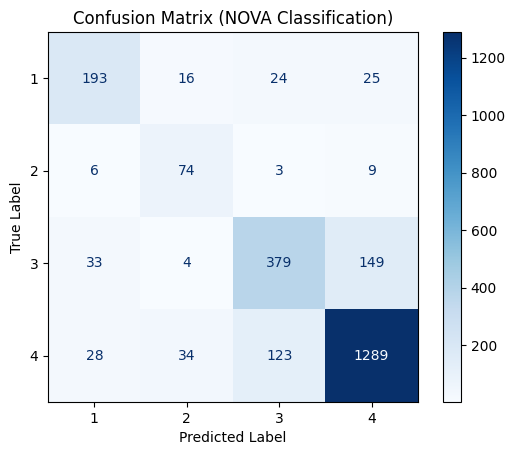

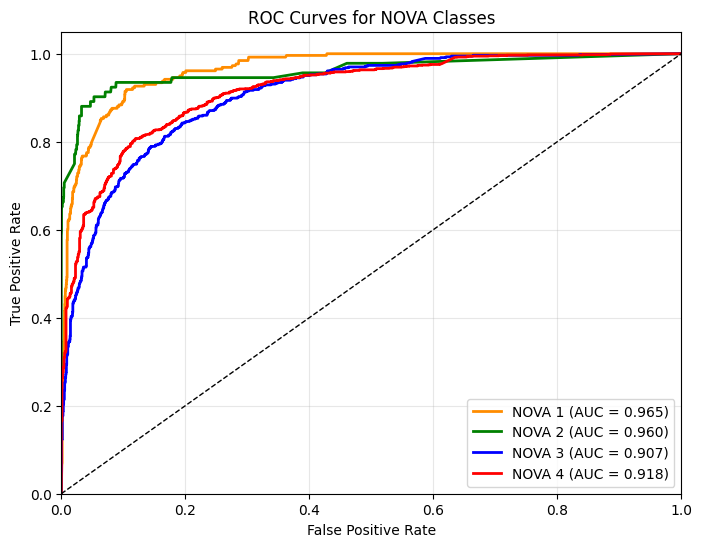

In [21]:
# ---------------------------------------
# 📊 Confusion Matrix
# ---------------------------------------
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=[1.0, 2.0, 3.0, 4.0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1, 2, 3, 4])

plt.figure(figsize=(6, 6))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix (NOVA Classification)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# ---------------------------------------
# 📈 ROC Curves per NOVA Class
# ---------------------------------------
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Binarize the true labels (for multiclass ROC)
y_test_bin = label_binarize(y_test, classes=[1.0, 2.0, 3.0, 4.0])
n_classes = y_test_bin.shape[1]

plt.figure(figsize=(8, 6))
colors = ['darkorange', 'green', 'blue', 'red']

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i], lw=2,
             label=f'NOVA {i+1} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for NOVA Classes')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()


In [22]:
y_pred = best_rf_balanced.predict(X_test)
probs = best_rf_balanced.predict_proba(X_test)
results = pd.DataFrame(probs, columns=['Prob_NOVA1','Prob_NOVA2','Prob_NOVA3','Prob_NOVA4'])
results['Pred_NOVA'] = y_pred
results['True_NOVA'] = y_test.values  # still in 1–4
results['FPro'] = (1 - results['Prob_NOVA1'] + results['Prob_NOVA4']) / 2
results.head(10)

,Prob_NOVA1,Prob_NOVA2,Prob_NOVA3,Prob_NOVA4,Pred_NOVA,True_NOVA,FPro
0,0.004933,0.000000,0.002856,0.992212,4.0,4.0,0.993640
1,0.309309,0.554555,0.058058,0.078078,2.0,2.0,0.384384
2,0.001558,0.004673,0.001558,0.992212,4.0,4.0,0.995327
3,0.003115,0.006490,0.038941,0.951454,4.0,4.0,0.974169
4,0.000000,0.992471,0.000000,0.007529,2.0,2.0,0.503764
5,0.016615,0.000000,0.408100,0.575286,4.0,4.0,0.779335
6,0.000000,0.000000,0.000000,1.000000,4.0,4.0,1.000000
7,0.000000,1.000000,0.000000,0.000000,2.0,2.0,0.500000
8,0.126168,0.013499,0.768692,0.091641,3.0,4.0,0.482736
9,0.252596,0.000000,0.552440,0.194964,3.0,3.0,0.471184


In [23]:
sample = results.sample(10, random_state=42)
print(sample[['True_NOVA', 'Pred_NOVA', 'Prob_NOVA1', 'Prob_NOVA2', 'Prob_NOVA3', 'Prob_NOVA4', 'FPro']])

      True_NOVA  Pred_NOVA  Prob_NOVA1  Prob_NOVA2  Prob_NOVA3  Prob_NOVA4  \
1320        1.0        1.0    0.878442    0.000168    0.000000    0.121390   
1412        3.0        3.0    0.027259    0.012721    0.551142    0.408879   
530         3.0        3.0    0.013240    0.003894    0.518951    0.463915   
554         4.0        4.0    0.051142    0.005452    0.209502    0.733904   
229         4.0        4.0    0.000000    0.000000    0.003894    0.996106   
472         1.0        1.0    0.988837    0.000000    0.000000    0.011163   
282         4.0        4.0    0.000000    0.000000    0.014278    0.985722   
1783        4.0        4.0    0.000000    0.000779    0.011163    0.988058   
2198        4.0        2.0    0.309309    0.554555    0.058058    0.078078   
2089        4.0        4.0    0.003115    0.000000    0.065421    0.931464   

          FPro  
1320  0.121474  
1412  0.690810  
530   0.725337  
554   0.841381  
229   0.998053  
472   0.011163  
282   0.992861  
1783 

WITH TOP TEN FEATURES

SODIUM_MG                              0.144562
ENERGY_KCAL                            0.127328
PROTEIN_G                              0.107741
TOTAL_FAT_G                            0.105975
SUGARS_TOTALG                          0.097467
CARBOHYDRATE_G                         0.096725
FATTY_ACIDS_TOTAL_SATURATED_G          0.075118
FIBER_TOTAL_DIETARY_G                  0.057507
CALCIUM_MG                             0.014185
MAGNESIUM_MG                           0.011763
POTASSIUM_MG                           0.010063
VITAMIN_C_MG                           0.009753
IRONMG                                 0.007369
FOLIC_ACID_MCG                         0.006753
FATTY_ACIDS_TOTAL_MONOUNSATURATED_G    0.006638
FATTY_ACIDS_TOTAL_POLYUNSATURATED_G    0.005989
SELENIUM_MCG                           0.005766
ZINCMG                                 0.005729
PHOSPHORUS_MG                          0.005676
LUTEIN_ZEAXANTHIN_MCG                  0.005539
WATERG                                 0

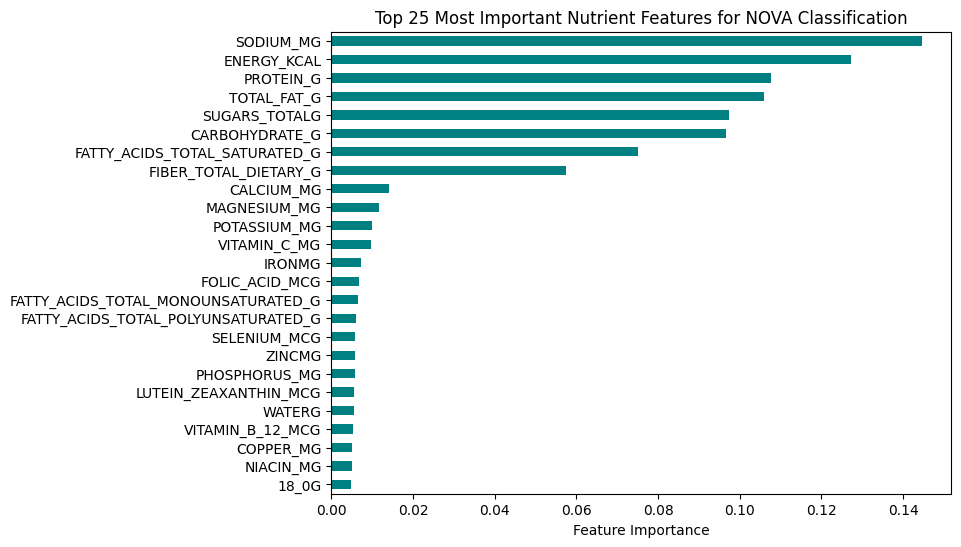

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Feature importance from your best Random Forest
importances = pd.Series(best_rf_balanced.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

# Display top 20
top_features = importances.head(25)
print(top_features)

plt.figure(figsize=(8,6))
top_features.plot(kind='barh', color='teal')
plt.gca().invert_yaxis()
plt.title("Top 25 Most Important Nutrient Features for NOVA Classification")
plt.xlabel("Feature Importance")
plt.show()


In [25]:
selected_features = importances.head(10).index  # top 25 or 30
X_selected = X_log[selected_features]
selected_features

Index(['SODIUM_MG', 'ENERGY_KCAL', 'PROTEIN_G', 'TOTAL_FAT_G', 'SUGARS_TOTALG',
       'CARBOHYDRATE_G', 'FATTY_ACIDS_TOTAL_SATURATED_G',
       'FIBER_TOTAL_DIETARY_G', 'CALCIUM_MG', 'MAGNESIUM_MG'],
      dtype='object')

In [26]:
# ---------------------------------------
# 📦 Imports
# ---------------------------------------
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
from scipy.stats import randint
import warnings
warnings.filterwarnings('ignore')

# ---------------------------------------
# 🧠 1️⃣ Train-Test Split (stratified)
# ---------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, stratify=y, random_state=42
)

print("Class distribution (before SMOTE):")
print(y_train.value_counts(normalize=True))

# ---------------------------------------
# ⚖️ 2️⃣ Apply SMOTE only on training data
# ---------------------------------------
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("\nClass distribution (after SMOTE):")
print(y_train_res.value_counts(normalize=True))

# ---------------------------------------
# 🌲 3️⃣ Define model with class_weight balancing
# ---------------------------------------
rf = RandomForestClassifier(
    class_weight='balanced_subsample',
    random_state=42
)

param_dist = {
    'n_estimators': randint(300, 1000),
    'max_depth': [10, 20, 30, None],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Stratified 5-fold CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# ---------------------------------------
# 🔍 4️⃣ RandomizedSearchCV
# ---------------------------------------
search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=20,
    scoring='f1_macro',
    cv=cv,
    random_state=42,
    verbose=2,
    n_jobs=-1
)

search.fit(X_train_res, y_train_res)

best_rf_balanced = search.best_estimator_

print("\nBest parameters:", search.best_params_)
print("Best CV macro F1:", search.best_score_)

# ---------------------------------------
# 🧾 5️⃣ Evaluate on test set
# ---------------------------------------
y_pred = best_rf_balanced.predict(X_test)
probs = best_rf_balanced.predict_proba(X_test)
report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", report)

# ---------------------------------------
# 📈 6️⃣ AUC (per-class + macro)
# ---------------------------------------
y_test_bin = pd.get_dummies(y_test)
auc_scores = {}
for i, cls in enumerate(y_test_bin.columns):
    auc = roc_auc_score(y_test_bin[cls], probs[:, i])
    auc_scores[cls] = auc
macro_auc = np.mean(list(auc_scores.values()))

print("\nAUC per class:", auc_scores)
print("Macro AUC:", macro_auc)

# ---------------------------------------
# 🔍 7️⃣ Predicted class distribution
# ---------------------------------------
pred_dist = pd.Series(y_pred).value_counts(normalize=True)
print("\nPredicted class proportions:")
print(pred_dist)


Class distribution (before SMOTE):
NOVA_GROUP
4.0    0.616890
3.0    0.236605
1.0    0.107995
2.0    0.038510
Name: proportion, dtype: float64

Class distribution (after SMOTE):
NOVA_GROUP
4.0    0.25
3.0    0.25
2.0    0.25
1.0    0.25
Name: proportion, dtype: float64
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Best parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 321}
Best CV macro F1: 0.9100040967130205

Classification Report:
               precision    recall  f1-score   support

         1.0       0.68      0.74      0.71       258
         2.0       0.58      0.79      0.67        92
         3.0       0.71      0.67      0.69       565
         4.0       0.87      0.86      0.87      1474

    accuracy                           0.80      2389
   macro avg       0.71      0.77      0.74      2389
weighted avg       0.80      0.80      0.80      2389


AUC per class: {1.0:

In [27]:
y_pred = best_rf_balanced.predict(X_test)
probs = best_rf_balanced.predict_proba(X_test)
results = pd.DataFrame(probs, columns=['Prob_NOVA1','Prob_NOVA2','Prob_NOVA3','Prob_NOVA4'])
results['Pred_NOVA'] = y_pred
results['True_NOVA'] = y_test.values  # still in 1–4
results['FPro'] = (1 - results['Prob_NOVA1'] + results['Prob_NOVA4']) / 2
results.head(10)

,Prob_NOVA1,Prob_NOVA2,Prob_NOVA3,Prob_NOVA4,Pred_NOVA,True_NOVA,FPro
0,0.003115,0.000000,0.000000,0.996885,4.0,4.0,0.996885
1,0.309309,0.554555,0.058058,0.078078,2.0,2.0,0.384384
2,0.003634,0.000000,0.004154,0.992212,4.0,4.0,0.994289
3,0.000000,0.004154,0.048806,0.947040,4.0,4.0,0.973520
4,0.000000,0.998442,0.000000,0.001558,2.0,2.0,0.500779
5,0.010384,0.006231,0.323468,0.659917,4.0,4.0,0.824766
6,0.000000,0.000000,0.000000,1.000000,4.0,4.0,1.000000
7,0.000000,1.000000,0.000000,0.000000,2.0,2.0,0.500000
8,0.103842,0.008307,0.816199,0.071651,3.0,4.0,0.483904
9,0.247404,0.001038,0.556594,0.194964,3.0,3.0,0.473780


In [28]:
X_selected

,SODIUM_MG,ENERGY_KCAL,PROTEIN_G,TOTAL_FAT_G,SUGARS_TOTALG,CARBOHYDRATE_G,FATTY_ACIDS_TOTAL_SATURATED_G,FIBER_TOTAL_DIETARY_G,CALCIUM_MG,MAGNESIUM_MG
0,3.688879,3.970292,1.465568,1.144223,1.771557,1.763017,0.810486,0.000000,4.836282,2.564949
1,3.663562,4.127134,1.451614,1.435085,1.759581,1.728109,1.050822,0.000000,4.820282,2.564949
2,3.688879,3.931826,1.472472,1.064711,1.773256,1.774952,0.746688,0.000000,4.844187,2.564949
3,3.688879,3.784190,1.477049,0.667829,1.785070,1.821318,0.449801,0.000000,4.844187,2.564949
4,3.737670,3.555348,1.488400,0.076961,1.800058,1.778336,0.047837,0.000000,4.890349,2.564949
...,...,...,...,...,...,...,...,...,...,...
11940,4.330733,5.707110,0.000000,0.000000,3.931826,4.330733,0.916291,2.397895,0.000000,0.000000
11941,5.746203,5.056246,2.944439,2.079442,0.832909,1.223775,0.587787,1.931521,0.000000,0.000000
11942,0.000000,5.407172,1.987874,0.788457,0.405465,3.828641,0.262364,1.280934,0.000000,0.000000
11943,6.634633,6.249975,1.871802,3.433987,1.029619,3.988984,2.639057,2.208274,0.000000,0.000000


In [29]:
wrong = X_test.copy()
wrong['True'] = y_test
wrong['Pred'] = y_pred
wrong = wrong[wrong['True'] != wrong['Pred']]
wrong.head(20)

,SODIUM_MG,ENERGY_KCAL,PROTEIN_G,TOTAL_FAT_G,SUGARS_TOTALG,CARBOHYDRATE_G,FATTY_ACIDS_TOTAL_SATURATED_G,FIBER_TOTAL_DIETARY_G,CALCIUM_MG,MAGNESIUM_MG,True,Pred
11484,0.867100,5.866468,3.265759,3.370738,0.389336,0.389336,2.995732,0.000000,0.000000,0.000000,4.0,3.0
11660,0.357674,4.828314,1.223775,0.095310,0.048790,3.346389,0.095310,1.098612,0.000000,0.000000,4.0,1.0
7623,5.579730,4.007333,0.587787,1.131402,1.458615,2.140066,0.788457,0.693147,0.000000,0.000000,3.0,4.0
2737,7.003974,4.248495,1.658228,1.477049,0.883768,1.840550,0.224742,1.667707,4.158883,3.891820,3.0,4.0
7998,8.850947,5.655992,2.128232,1.360977,3.173878,3.972177,0.470004,2.424803,0.000000,0.000000,4.0,3.0
5284,5.866468,6.395262,3.135494,3.871201,1.774952,3.135494,2.041220,2.128232,0.000000,0.000000,4.0,3.0
5321,3.583519,4.564348,2.302585,1.791759,1.504077,1.504077,1.481605,1.083499,4.859812,0.000000,1.0,3.0
3005,2.079442,5.283204,0.198851,0.530628,3.816833,3.929666,0.024693,0.262364,2.079442,2.079442,4.0,3.0
11197,1.945910,3.970292,1.360977,1.193922,1.791759,1.791759,0.405465,1.083499,4.615121,0.000000,4.0,1.0
4620,0.000000,3.763523,0.000000,0.000000,2.424803,2.424803,0.000000,1.083499,0.000000,0.000000,4.0,1.0


In [30]:
wrong.groupby(['True', 'Pred']).size()

True  Pred
1.0   2.0      15
      3.0      26
      4.0      25
2.0   1.0       6
      3.0       3
      4.0      10
3.0   1.0      34
      2.0       5
      4.0     147
4.0   1.0      49
      2.0      32
      3.0     127
dtype: int64

Performing 5 fold stratified CV to improve model performance

In [31]:
#performing 5 fold stratified CV to improve model performance
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from scipy.stats import randint
import numpy as np

# Define the model
rf = RandomForestClassifier(class_weight='balanced', random_state=42)

# Define hyperparameter ranges (as in the paper)
param_dist = {
    'n_estimators': randint(200, 2000),
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# 5-fold stratified CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Randomized search
search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=20,              # number of random combinations
    scoring='f1_macro',     # or 'accuracy'
    cv=cv,
    random_state=42,
    verbose=2,
    n_jobs=-1
)

search.fit(X_log, y)

print("Best parameters:", search.best_params_)
print("Best CV score (macro F1):", search.best_score_)
best_rf = search.best_estimator_


Fitting 5 folds for each of 20 candidates, totalling 100 fits


KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = best_rf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         1.0       0.97      0.94      0.95       258
         2.0       0.67      1.00      0.80        92
         3.0       0.99      0.99      0.99       565
         4.0       1.00      0.97      0.99      1474

    accuracy                           0.98      2389
   macro avg       0.91      0.98      0.93      2389
weighted avg       0.98      0.98      0.98      2389



In [ ]:
probs = best_rf.predict_proba(X_test)
fpro = (1 - probs[:, 0] + probs[:, 3]) / 2

In [ ]:
results = pd.DataFrame(probs, columns=['Prob_NOVA1','Prob_NOVA2','Prob_NOVA3','Prob_NOVA4'])
results['Pred_NOVA'] = best_rf.predict(X_test)
results['True_NOVA'] = y_test.values
results['FPro'] = fpro
results.head(10)

,Prob_NOVA1,Prob_NOVA2,Prob_NOVA3,Prob_NOVA4,Pred_NOVA,True_NOVA,FPro
0,0.000000,0.000000,0.009172,0.990828,4.0,4.0,0.995414
1,0.330687,0.524160,0.061255,0.083897,2.0,2.0,0.376605
2,0.000000,0.000000,0.000000,1.000000,4.0,4.0,1.000000
3,0.000000,0.000000,0.017564,0.982436,4.0,4.0,0.991218
4,0.000000,0.999726,0.000000,0.000274,2.0,2.0,0.500137
5,0.007702,0.000000,0.085600,0.906699,4.0,4.0,0.949499
6,0.000000,0.000000,0.003797,0.996203,4.0,4.0,0.998102
7,0.000000,1.000000,0.000000,0.000000,2.0,2.0,0.500000
8,0.069180,0.008411,0.365507,0.556902,4.0,4.0,0.743861
9,0.038424,0.000000,0.916243,0.045333,3.0,3.0,0.503455


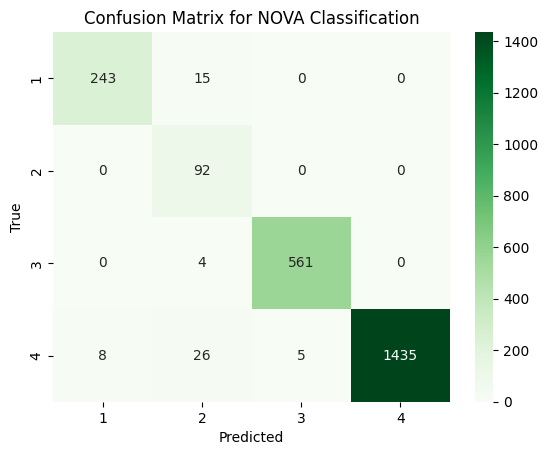

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, results['Pred_NOVA'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=[1,2,3,4], yticklabels=[1,2,3,4])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for NOVA Classification")
plt.show()

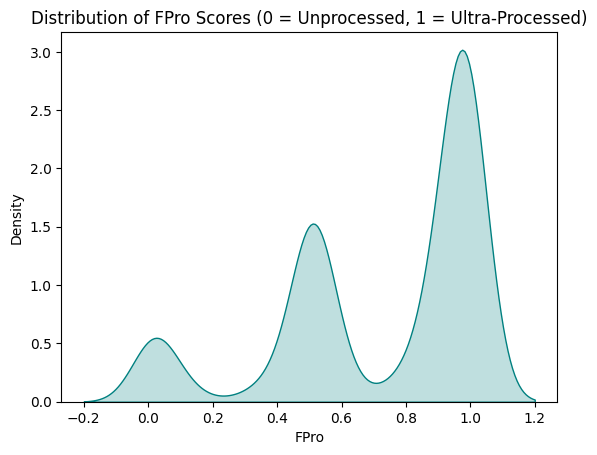

In [ ]:
import seaborn as sns
sns.kdeplot(results['FPro'], fill=True, color='teal')
plt.title("Distribution of FPro Scores (0 = Unprocessed, 1 = Ultra-Processed)")
plt.xlabel("FPro")
plt.show()


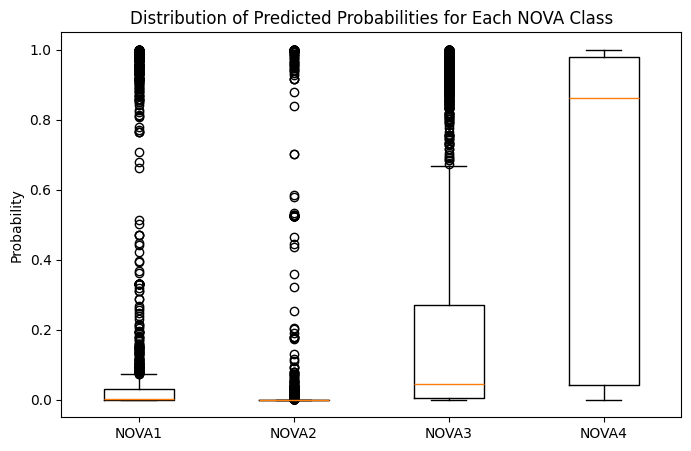

In [ ]:
# Sort by predicted class probability
sorted_df = results.sort_values(by='Pred_NOVA', ascending=True)

# Or plot class probability distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.boxplot([probs[:,0], probs[:,1], probs[:,2], probs[:,3]],
            tick_labels=['NOVA1','NOVA2','NOVA3','NOVA4'])
plt.title("Distribution of Predicted Probabilities for Each NOVA Class")
plt.ylabel("Probability")
plt.show()


In [ ]:
from sklearn.metrics import roc_auc_score

# One-hot encode y_test if it's not already
from sklearn.preprocessing import label_binarize
import numpy as np

classes = [1, 2, 3, 4]
y_test_bin = label_binarize(y_test, classes=classes)

# Predicted probabilities from your best model
y_proba = best_rf.predict_proba(X_test)

# Compute ROC AUC for each class (one-vs-rest)
auc_per_class = roc_auc_score(y_test_bin, y_proba, average=None)
macro_auc = roc_auc_score(y_test_bin, y_proba, average='macro')
weighted_auc = roc_auc_score(y_test_bin, y_proba, average='weighted')

for i, c in enumerate(classes):
    print(f"AUC for NOVA {c}: {auc_per_class[i]:.4f}")
print(f"\nMacro AUC: {macro_auc:.4f}")
print(f"Weighted AUC: {weighted_auc:.4f}")


AUC for NOVA 1: 0.9990
AUC for NOVA 2: 0.9995
AUC for NOVA 3: 0.9981
AUC for NOVA 4: 0.9969

Macro AUC: 0.9984
Weighted AUC: 0.9975


In [ ]:
train_pred = best_rf.predict(X_train)
test_pred  = best_rf.predict(X_test)

from sklearn.metrics import accuracy_score
print("Train Accuracy:", accuracy_score(y_train, train_pred))
print("Test Accuracy:", accuracy_score(y_test,  test_pred))
best_rf_acc = accuracy_score(y_test,  test_pred)
print("Best RF Test Accuracy:", best_rf_acc)

Train Accuracy: 0.9744663038928422
Test Accuracy: 0.9757220594390958
Best RF Test Accuracy: 0.9757220594390958


In [ ]:
cv_results = pd.DataFrame(search.cv_results_)
cv_results[['mean_test_score','std_test_score']].sort_values(by='mean_test_score',ascending=False).head()

,mean_test_score,std_test_score
4,0.752270,0.012691
5,0.752138,0.011593
18,0.749756,0.011885
9,0.749749,0.010617
8,0.749043,0.014195


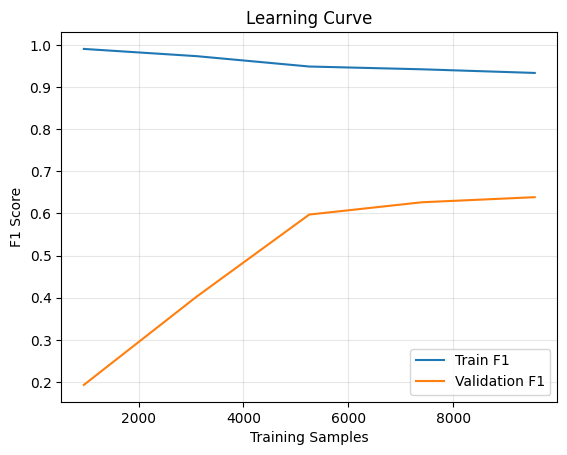

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

train_sizes, train_scores, val_scores = learning_curve(
    best_rf, X_log, y, cv=5, scoring='f1_macro', n_jobs=-1)

plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Train F1')
plt.plot(train_sizes, np.mean(val_scores, axis=1), label='Validation F1')
plt.xlabel("Training Samples")
plt.ylabel("F1 Score")
plt.legend()
plt.title("Learning Curve")
plt.grid(alpha=0.3)
plt.show()


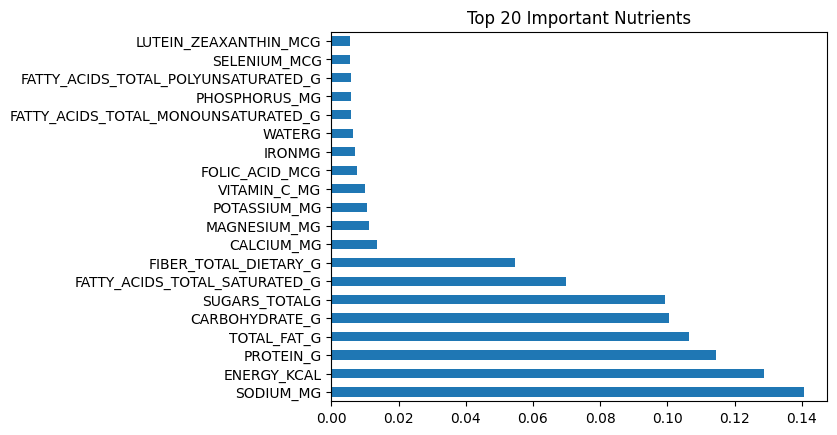

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

feature_importance = pd.Series(best_rf.feature_importances_, index=X.columns)
feature_importance.nlargest(20).plot(kind='barh', title="Top 20 Important Nutrients")
plt.show()


Training xgboost model

In [ ]:
#tried xgboost model training
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from scipy.stats import uniform, randint

# Shift y labels
y_adj = y.astype(int) - 1

xgb = XGBClassifier(
    objective='multi:softprob',
    num_class=4,
    random_state=42,
    eval_metric='mlogloss'
)

param_dist = {
    'n_estimators': randint(200, 1000),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.2),
    'subsample': uniform(0.7, 0.3),
    'colsample_bytree': uniform(0.7, 0.3),
    'gamma': uniform(0, 0.3)
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

search_xgb = RandomizedSearchCV(
    xgb,
    param_distributions=param_dist,
    n_iter=20,
    scoring='f1_macro',
    cv=cv,
    random_state=42,
    verbose=2,
    n_jobs=-1
)

search_xgb.fit(X_log, y_adj)

print("Best parameters:", search_xgb.best_params_)
print("Best CV score (macro F1):", search_xgb.best_score_)
best_xgb = search_xgb.best_estimator_


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'colsample_bytree': 0.7932946965146986, 'gamma': 0.09755499660802411, 'learning_rate': 0.15592123566761282, 'max_depth': 8, 'n_estimators': 746, 'subsample': 0.8416644775485848}
Best CV score (macro F1): 0.7769232669113967


In [ ]:
train_pred = best_xgb.predict(X_train)+1
test_pred  = best_xgb.predict(X_test)+1

y_pred = best_xgb.predict(X_test)+1
print(classification_report(y_test, y_pred))
from sklearn.metrics import accuracy_score
print("Train Accuracy:", accuracy_score(y_train, train_pred))
xgb_acc=accuracy_score(y_train, train_pred)
print("Test Accuracy:", accuracy_score(y_test,  test_pred))

              precision    recall  f1-score   support

         1.0       0.97      0.95      0.96       258
         2.0       0.99      0.92      0.96        92
         3.0       1.00      0.99      0.99       565
         4.0       0.99      1.00      0.99      1474

    accuracy                           0.99      2389
   macro avg       0.99      0.97      0.98      2389
weighted avg       0.99      0.99      0.99      2389

Train Accuracy: 0.9827333612390121
Test Accuracy: 0.9866052741732942


In [ ]:
y_pred = best_xgb.predict(X_test) + 1
probs = best_xgb.predict_proba(X_test)
results = pd.DataFrame(probs, columns=['Prob_NOVA1','Prob_NOVA2','Prob_NOVA3','Prob_NOVA4'])
results['Pred_NOVA'] = y_pred
results['True_NOVA'] = y_test.values  # still in 1–4
results['FPro'] = (1 - results['Prob_NOVA1'] + results['Prob_NOVA4']) / 2
results.head()

,Prob_NOVA1,Prob_NOVA2,Prob_NOVA3,Prob_NOVA4,Pred_NOVA,True_NOVA,FPro
0,4.879647e-04,3.171536e-06,0.000825,0.998684,4,4.0,0.999098
1,2.947951e-01,1.647324e-01,0.120100,0.420373,4,2.0,0.562789
2,2.434185e-06,2.879727e-07,0.000005,0.999992,4,4.0,0.999995
3,3.494183e-07,8.970069e-07,0.000173,0.999826,4,4.0,0.999913
4,1.014796e-04,9.994034e-01,0.000128,0.000367,2,2.0,0.500133


In [ ]:
from sklearn.metrics import roc_auc_score

# One-hot encode y_test if it's not already
from sklearn.preprocessing import label_binarize
import numpy as np

classes = [1, 2, 3, 4]
y_test_bin = label_binarize(y_test, classes=classes)

# Predicted probabilities from your best model
y_proba = best_xgb.predict_proba(X_test)

# Compute ROC AUC for each class (one-vs-rest)
auc_per_class = roc_auc_score(y_test_bin, y_proba, average=None)
xgb_macro_auc = roc_auc_score(y_test_bin, y_proba, average='macro')
xgb_weighted_auc = roc_auc_score(y_test_bin, y_proba, average='weighted')

for i, c in enumerate(classes):
    print(f"AUC for NOVA {c}: {auc_per_class[i]:.4f}")
print(f"\nMacro AUC: {xgb_macro_auc:.4f}")
print(f"Weighted AUC: {xgb_weighted_auc:.4f}")


AUC for NOVA 1: 0.9995
AUC for NOVA 2: 0.9995
AUC for NOVA 3: 0.9998
AUC for NOVA 4: 0.9996

Macro AUC: 0.9996
Weighted AUC: 0.9996


going with rf

SODIUM_MG                              0.140592
ENERGY_KCAL                            0.128809
PROTEIN_G                              0.114609
TOTAL_FAT_G                            0.106476
CARBOHYDRATE_G                         0.100633
SUGARS_TOTALG                          0.099275
FATTY_ACIDS_TOTAL_SATURATED_G          0.069731
FIBER_TOTAL_DIETARY_G                  0.054711
CALCIUM_MG                             0.013717
MAGNESIUM_MG                           0.011065
POTASSIUM_MG                           0.010645
VITAMIN_C_MG                           0.009941
FOLIC_ACID_MCG                         0.007709
IRONMG                                 0.006945
WATERG                                 0.006434
FATTY_ACIDS_TOTAL_MONOUNSATURATED_G    0.005865
PHOSPHORUS_MG                          0.005778
FATTY_ACIDS_TOTAL_POLYUNSATURATED_G    0.005770
SELENIUM_MCG                           0.005512
LUTEIN_ZEAXANTHIN_MCG                  0.005432
18_0G                                  0

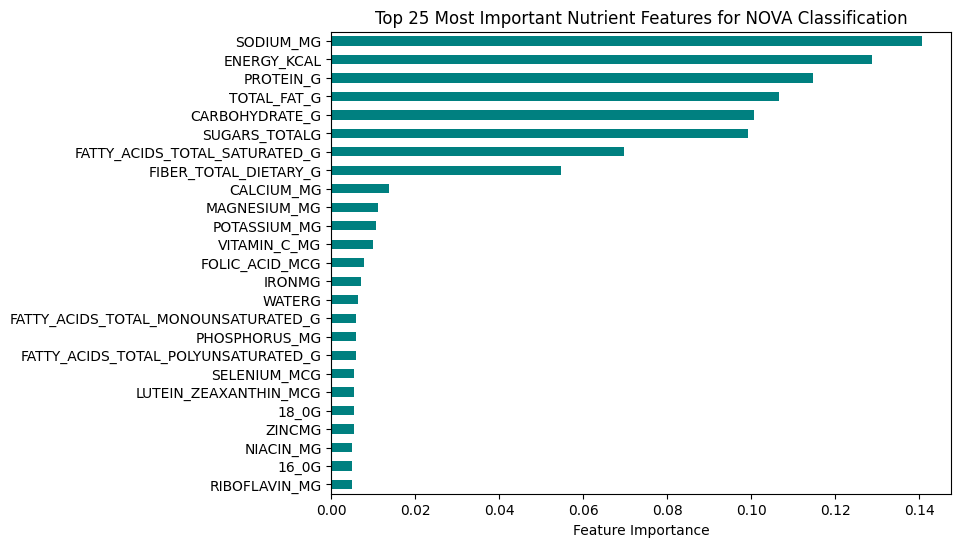

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Feature importance from your best Random Forest
importances = pd.Series(best_rf.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

# Display top 20
top_features = importances.head(25)
print(top_features)

plt.figure(figsize=(8,6))
top_features.plot(kind='barh', color='teal')
plt.gca().invert_yaxis()
plt.title("Top 25 Most Important Nutrient Features for NOVA Classification")
plt.xlabel("Feature Importance")
plt.show()


Re training Random forest best model with selected 25 features

In [ ]:
#model trained with top 25 features
from sklearn.base import clone

selected_features = importances.head(25).index  # top 25 or 30
X_selected = X_log[selected_features]

best_rf_25 = clone(best_rf)
best_rf_25.fit(X_selected, y)
y_pred = best_rf_25.predict(X_test[selected_features])

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.98      0.95      0.96       258
         2.0       0.67      1.00      0.80        92
         3.0       0.99      0.99      0.99       565
         4.0       1.00      0.97      0.99      1474

    accuracy                           0.98      2389
   macro avg       0.91      0.98      0.94      2389
weighted avg       0.98      0.98      0.98      2389



In [ ]:
probs = best_rf_25.predict_proba(X_test[selected_features])
fpro = (1 - probs[:, 0] + probs[:, 3]) / 2

results = pd.DataFrame(probs, columns=['Prob_NOVA1','Prob_NOVA2','Prob_NOVA3','Prob_NOVA4'])
results['Pred_NOVA'] = best_rf_25.predict(X_test[selected_features])
results['True_NOVA'] = y_test.values
results['FPro'] = fpro
results.head(10)

,Prob_NOVA1,Prob_NOVA2,Prob_NOVA3,Prob_NOVA4,Pred_NOVA,True_NOVA,FPro
0,0.000000,0.000000,0.000000,1.000000,4.0,4.0,1.000000
1,0.330687,0.524160,0.061255,0.083897,2.0,2.0,0.376605
2,0.000000,0.000000,0.000000,1.000000,4.0,4.0,1.000000
3,0.000000,0.000000,0.016169,0.983831,4.0,4.0,0.991915
4,0.000000,0.999816,0.000000,0.000184,2.0,2.0,0.500092
5,0.007702,0.000000,0.072142,0.920157,4.0,4.0,0.956228
6,0.000000,0.000000,0.000000,1.000000,4.0,4.0,1.000000
7,0.000000,1.000000,0.000000,0.000000,2.0,2.0,0.500000
8,0.059900,0.000000,0.372377,0.567723,4.0,4.0,0.753911
9,0.014312,0.000000,0.946081,0.039607,3.0,3.0,0.512648


In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# One-hot encode y_test if it's not already
from sklearn.preprocessing import label_binarize
import numpy as np

classes = [1, 2, 3, 4]
y_test_bin = label_binarize(y_test, classes=classes)

# Predicted probabilities from your best model
y_proba = best_rf_25.predict_proba(X_test[selected_features])

# Compute ROC AUC for each class (one-vs-rest)
acc_score_25=accuracy_score(y_test, y_pred)
auc_per_class_25 = roc_auc_score(y_test_bin, y_proba, average=None)
macro_auc_25 = roc_auc_score(y_test_bin, y_proba, average='macro')
weighted_auc_25 = roc_auc_score(y_test_bin, y_proba, average='weighted')

for i, c in enumerate(classes):
    print(f"AUC for NOVA {c}: {auc_per_class_25[i]:.4f}")
print(f"\nMacro AUC: {macro_auc_25:.4f}")
print(f"Weighted AUC: {weighted_auc_25:.4f}")
print("Accuracy:", acc_score_25)
print("Confusion Matrix:")
cm = confusion_matrix(y_test, results['Pred_NOVA'])
print(cm)


AUC for NOVA 1: 0.9991
AUC for NOVA 2: 0.9994
AUC for NOVA 3: 0.9982
AUC for NOVA 4: 0.9974

Macro AUC: 0.9985
Weighted AUC: 0.9979
Accuracy: 0.9761406446211804
Confusion Matrix:
[[ 244   14    0    0]
 [   0   92    0    0]
 [   0    4  561    0]
 [   6   27    6 1435]]


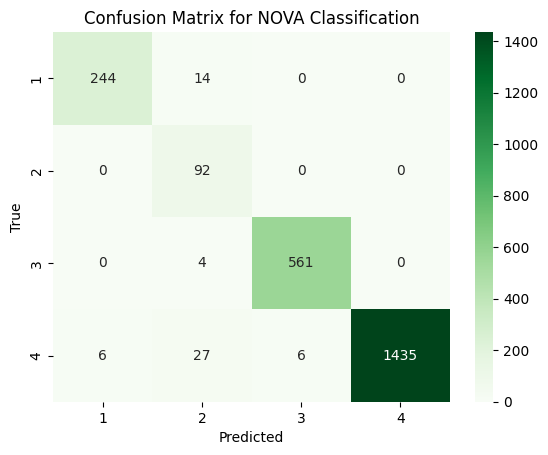

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, results['Pred_NOVA'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=[1,2,3,4], yticklabels=[1,2,3,4])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for NOVA Classification")
plt.show()

SODIUM_MG                        0.156751
ENERGY_KCAL                      0.139443
TOTAL_FAT_G                      0.118748
PROTEIN_G                        0.116969
CARBOHYDRATE_G                   0.101988
SUGARS_TOTALG                    0.099093
FATTY_ACIDS_TOTAL_SATURATED_G    0.066438
FIBER_TOTAL_DIETARY_G            0.053400
CALCIUM_MG                       0.014612
MAGNESIUM_MG                     0.012120
dtype: float64


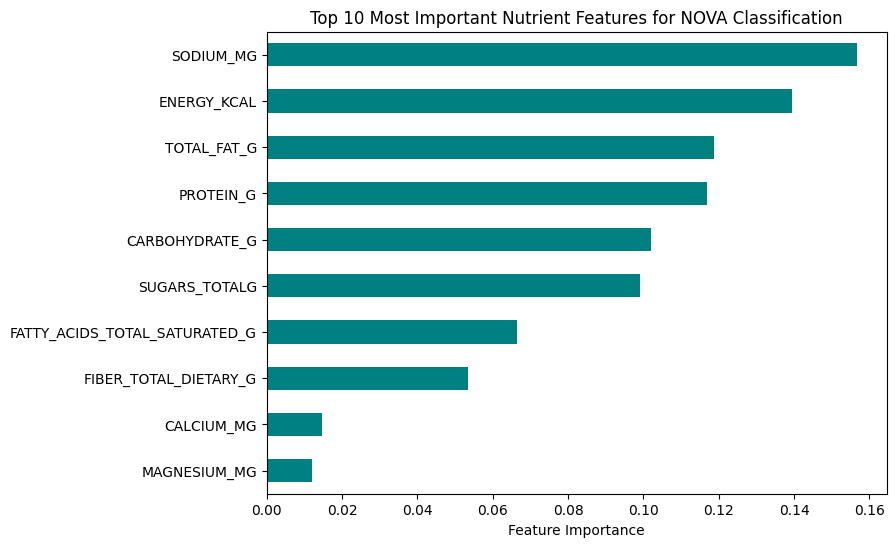

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Feature importance from your best Random Forest
importances = pd.Series(best_rf_25.feature_importances_, index=X[selected_features].columns)
importances = importances.sort_values(ascending=False)

# Display top 10
top_features = importances.head(10)
print(top_features)

plt.figure(figsize=(8,6))
top_features.plot(kind='barh', color='teal')
plt.gca().invert_yaxis()
plt.title("Top 10 Most Important Nutrient Features for NOVA Classification")
plt.xlabel("Feature Importance")
plt.show()

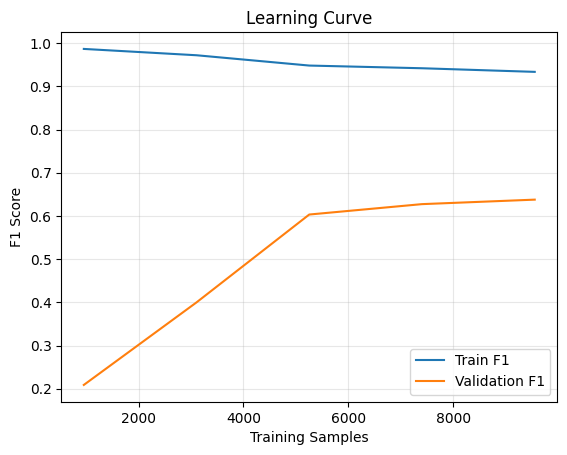

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

train_sizes, train_scores, val_scores = learning_curve(
    best_rf, X_selected, y, cv=5, scoring='f1_macro', n_jobs=-1)

plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Train F1')
plt.plot(train_sizes, np.mean(val_scores, axis=1), label='Validation F1')
plt.xlabel("Training Samples")
plt.ylabel("F1 Score")
plt.legend()
plt.title("Learning Curve")
plt.grid(alpha=0.3)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Assuming X (features) and y (labels) are already defined and preprocessed

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_log, y, test_size=0.2, random_state=42, stratify=y)

# Scale features for models that need it
"""scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)"""

# 1️⃣ Logistic Regression
log_reg = LogisticRegression(max_iter=500, multi_class='multinomial', solver='lbfgs')
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)
y_pred_proba_lr = log_reg.predict_proba(X_test)

print("\n🔹 Logistic Regression Results 🔹")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Macro AUC:", roc_auc_score(y_test, y_pred_proba_lr, multi_class='ovr', average='macro'))
print("Weighted AUC:", roc_auc_score(y_test, y_pred_proba_lr, multi_class='ovr', average='weighted'))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

# 2️⃣ Support Vector Machine (SVM)
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
y_pred_proba_svm = svm_model.predict_proba(X_test)

print("\n🔹 Support Vector Machine (SVM) Results 🔹")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Macro AUC:", roc_auc_score(y_test, y_pred_proba_svm, multi_class='ovr', average='macro'))
print("Weighted AUC:", roc_auc_score(y_test, y_pred_proba_svm, multi_class='ovr', average='weighted'))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



🔹 Logistic Regression Results 🔹
Accuracy: 0.6806195060694852
Macro AUC: 0.8424804919893791
Weighted AUC: 0.8048126713985796

Classification Report:
               precision    recall  f1-score   support

         1.0       0.47      0.43      0.45       258
         2.0       0.80      0.57      0.66        92
         3.0       0.59      0.25      0.36       565
         4.0       0.72      0.90      0.80      1474

    accuracy                           0.68      2389
   macro avg       0.64      0.54      0.57      2389
weighted avg       0.66      0.68      0.65      2389


🔹 Support Vector Machine (SVM) Results 🔹
Accuracy: 0.7111762243616576
Macro AUC: 0.8728299815559432
Weighted AUC: 0.831137711020981

Classification Report:
               precision    recall  f1-score   support

         1.0       0.64      0.47      0.54       258
         2.0       0.94      0.50      0.65        92
         3.0       0.79      0.19      0.31       565
         4.0       0.71      0.96      0

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import numpy as np


# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')
svm_model = SVC(probability=True, class_weight='balanced')

# Collect metrics manually
acc_scores_lr, auc_scores_lr = [], []
acc_scores_svm, auc_scores_svm = [], []
macro_auc_scores_lr,macro_auc_scores_svm=[],[]

for train_index, test_index in skf.split(X_log, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Logistic Regression
    log_reg.fit(X_train_scaled, y_train)
    y_pred_lr = log_reg.predict(X_test_scaled)
    y_proba_lr = log_reg.predict_proba(X_test_scaled)
    acc_scores_lr.append(accuracy_score(y_test, y_pred_lr))
    auc_scores_lr.append(roc_auc_score(y_test, y_proba_lr, multi_class='ovr', average='weighted'))
    macro_auc_scores_lr.append(roc_auc_score(y_test, y_proba_lr, multi_class='ovr', average='macro'))


    # SVM
    svm_model.fit(X_train_scaled, y_train)
    y_pred_svm = svm_model.predict(X_test_scaled)
    y_proba_svm = svm_model.predict_proba(X_test_scaled)
    acc_scores_svm.append(accuracy_score(y_test, y_pred_svm))
    auc_scores_svm.append(roc_auc_score(y_test, y_proba_svm, multi_class='ovr', average='weighted'))
    macro_auc_scores_svm.append(roc_auc_score(y_test, y_proba_svm, multi_class='ovr', average='macro'))

print("🔹 Logistic Regression (Stratified 5-Fold) 🔹")
print(f"Mean Accuracy: {np.mean(acc_scores_lr):.4f}")
print(f"Mean Weighted AUC: {np.mean(auc_scores_lr):.4f}")

print("🔹 SVM (Stratified 5-Fold) 🔹")
print(f"Mean Accuracy: {np.mean(acc_scores_svm):.4f}")
print(f"Mean Weighted AUC: {np.mean(auc_scores_svm):.4f}")


🔹 Logistic Regression (Stratified 5-Fold) 🔹
Mean Accuracy: 0.4852
Mean Weighted AUC: 0.7520
🔹 SVM (Stratified 5-Fold) 🔹
Mean Accuracy: 0.5181
Mean Weighted AUC: 0.7929


In [ ]:
train_pred = log_reg.predict(X_train_scaled)
test_pred  = log_reg.predict(X_test_scaled)

y_pred = log_reg.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
from sklearn.metrics import accuracy_score
print("Train Accuracy:", accuracy_score(y_train, train_pred))
print("Test Accuracy:", accuracy_score(y_test,  test_pred))

              precision    recall  f1-score   support

         1.0       0.32      0.88      0.47       258
         2.0       0.24      0.86      0.38        92
         3.0       0.43      0.55      0.48       565
         4.0       0.86      0.36      0.51      1474

    accuracy                           0.48      2389
   macro avg       0.46      0.66      0.46      2389
weighted avg       0.68      0.48      0.49      2389

Train Accuracy: 0.48796567601506907
Test Accuracy: 0.4809543742151528


In [ ]:
train_pred = svm_model.predict(X_train_scaled)
test_pred  = svm_model.predict(X_test_scaled)

y_pred = svm_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
from sklearn.metrics import accuracy_score
print("Train Accuracy:", accuracy_score(y_train, train_pred))
print("Test Accuracy:", accuracy_score(y_test,  test_pred))

              precision    recall  f1-score   support

         1.0       0.29      0.88      0.44       258
         2.0       0.51      0.80      0.62        92
         3.0       0.41      0.55      0.47       565
         4.0       0.91      0.43      0.59      1474

    accuracy                           0.52      2389
   macro avg       0.53      0.67      0.53      2389
weighted avg       0.71      0.52      0.54      2389

Train Accuracy: 0.5322310590205107
Test Accuracy: 0.5223943072415237


In [ ]:

results = {
    'Model': ['Random Forest', 'XGBoost', 'Logistic Regression', 'SVM'],
    'Accuracy': [best_rf_acc, xgb_acc, np.mean(acc_scores_lr), np.mean(acc_scores_svm)],
    'Macro AUC': [macro_auc, xgb_macro_auc, np.mean(macro_auc_scores_lr), np.mean(macro_auc_scores_svm)],
    'Weighted AUC': [weighted_auc, xgb_weighted_auc, np.mean(auc_scores_lr), np.mean(auc_scores_svm)]
}

# Create DataFrame
comparison_df = pd.DataFrame(results)

# Format table for display
comparison_df = comparison_df.round(4)
print("📊 Model Comparison Table:")
display(comparison_df)

📊 Model Comparison Table:


,Model,Accuracy,Macro AUC,Weighted AUC
0,Random Forest,0.9757,0.9984,0.9975
1,XGBoost,0.9827,0.9996,0.9996
2,Logistic Regression,0.4852,0.8132,0.7520
3,SVM,0.5181,0.8465,0.7929


In [ ]:
results = {
    'Model': ['Random Forest with 60 nutrients', 'Random Forest with 25 nutrients'],
    'Accuracy': [best_rf_acc, acc_score_25],
    'Macro AUC': [macro_auc, macro_auc_25],
    'Weighted AUC': [weighted_auc, weighted_auc_25]
}

# Create DataFrame
comparison_df = pd.DataFrame(results)

# Format table for display
comparison_df = comparison_df.round(4)
print("📊 Model Comparison Table:")
display(comparison_df)

📊 Model Comparison Table:


,Model,Accuracy,Macro AUC,Weighted AUC
0,Random Forest with 60 nutrients,0.9757,0.9984,0.9975
1,Random Forest with 25 nutrients,0.9761,0.9985,0.9979


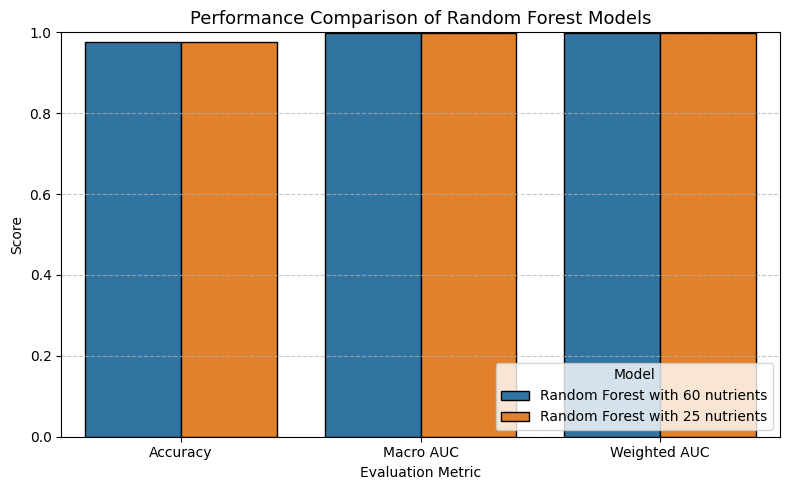

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Melt dataframe for easier plotting
comparison_melted = comparison_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(8, 5))
sns.barplot(data=comparison_melted, x='Metric', y='Score', hue='Model', edgecolor='black')

plt.title('Performance Comparison of Random Forest Models', fontsize=13)
plt.ylabel('Score')
plt.xlabel('Evaluation Metric')
plt.ylim(0, 1.0)
plt.legend(title='Model', loc='lower right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


training rf with 10 top features

In [ ]:
selected_features = importances.head(10).index  # top 10
selected_features

Index(['SODIUM_MG', 'ENERGY_KCAL', 'TOTAL_FAT_G', 'PROTEIN_G',
       'CARBOHYDRATE_G', 'SUGARS_TOTALG', 'FATTY_ACIDS_TOTAL_SATURATED_G',
       'FIBER_TOTAL_DIETARY_G', 'CALCIUM_MG', 'MAGNESIUM_MG'],
      dtype='object')

In [ ]:
#model trained with top 10 features
from sklearn.base import clone

selected_features = importances.head(10).index
X_selected = X_log[selected_features]

best_rf_10 = clone(best_rf)
best_rf_10.fit(X_selected, y)
y_pred = best_rf_10.predict(X_test[selected_features])

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.32      0.24      0.27       258
         2.0       0.31      0.30      0.31        92
         3.0       0.22      0.21      0.22       565
         4.0       0.63      0.67      0.65      1474

    accuracy                           0.50      2389
   macro avg       0.37      0.36      0.36      2389
weighted avg       0.49      0.50      0.49      2389



In [ ]:
len(X_selected.columns)

10

In [ ]:
probs = best_rf_10.predict_proba(X_test[selected_features])
fpro = (1 - probs[:, 0] + probs[:, 3]) / 2

results = pd.DataFrame(probs, columns=['Prob_NOVA1','Prob_NOVA2','Prob_NOVA3','Prob_NOVA4'])
results['Pred_NOVA'] = best_rf_10.predict(X_test[selected_features])
results['True_NOVA'] = y_test.values
results['FPro'] = fpro
results.head(10)

,Prob_NOVA1,Prob_NOVA2,Prob_NOVA3,Prob_NOVA4,Pred_NOVA,True_NOVA,FPro
0,0.165230,0.098763,0.299627,0.436380,4.0,1.0,0.635575
1,0.139832,0.094871,0.298026,0.467270,4.0,1.0,0.663719
2,0.161379,0.098763,0.305406,0.434451,4.0,1.0,0.636536
3,0.282173,0.078909,0.368070,0.270847,3.0,2.0,0.494337
4,0.169215,0.121868,0.278357,0.430561,4.0,4.0,0.630673
5,0.308493,0.040023,0.400150,0.251334,3.0,1.0,0.471420
6,0.243624,0.053655,0.445601,0.257120,3.0,4.0,0.506748
7,0.128344,0.162165,0.326980,0.382511,4.0,4.0,0.627083
8,0.100957,0.090840,0.338227,0.469976,4.0,4.0,0.684510
9,0.123820,0.108733,0.332881,0.434566,4.0,4.0,0.655373


In [ ]:
train_pred = best_rf_10.predict(X_train[selected_features])
test_pred  = best_rf_10.predict(X_test[selected_features])

y_pred = best_rf_10.predict(X_test[selected_features])
print(classification_report(y_test, y_pred))
from sklearn.metrics import accuracy_score
print("Train Accuracy:", accuracy_score(y_train, train_pred))
print("Test Accuracy:", accuracy_score(y_test,  test_pred))

              precision    recall  f1-score   support

         1.0       0.32      0.24      0.27       258
         2.0       0.31      0.30      0.31        92
         3.0       0.22      0.21      0.22       565
         4.0       0.63      0.67      0.65      1474

    accuracy                           0.50      2389
   macro avg       0.37      0.36      0.36      2389
weighted avg       0.49      0.50      0.49      2389

Train Accuracy: 0.49570950188363333
Test Accuracy: 0.5002092925910423


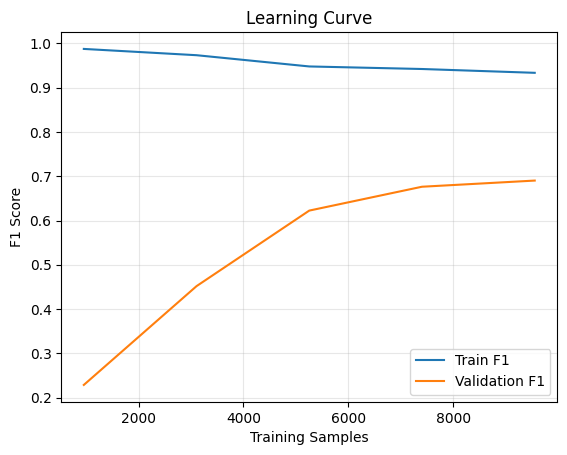

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

train_sizes, train_scores, val_scores = learning_curve(
    best_rf_10, X_selected, y, cv=5, scoring='f1_macro', n_jobs=-1)

plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Train F1')
plt.plot(train_sizes, np.mean(val_scores, axis=1), label='Validation F1')
plt.xlabel("Training Samples")
plt.ylabel("F1 Score")
plt.legend()
plt.title("Learning Curve")
plt.grid(alpha=0.3)
plt.show()

In [ ]:
preds = best_rf_10.predict(X_test[selected_features])
probs = best_rf_10.predict_proba(X_test[selected_features])
pd.Series(preds).value_counts(normalize=True)


4.0    0.652574
3.0    0.228966
1.0    0.081206
2.0    0.037254
Name: proportion, dtype: float64

In [32]:


# ---------------------------------------
# 🧪 7️⃣ Manual Test Prediction
# ---------------------------------------

# Define the column order (same as used during training)
cols = [
    'SODIUM_MG', 'ENERGY_KCAL', 'PROTEIN_G', 'TOTAL_FAT_G', 'SUGARS_TOTALG',
       'CARBOHYDRATE_G', 'FATTY_ACIDS_TOTAL_SATURATED_G',
       'FIBER_TOTAL_DIETARY_G', 'CALCIUM_MG', 'MAGNESIUM_MG'
]

# Example food data (values in same units as training)
# You can tweak these numbers to test different foods
sample_input = pd.DataFrame([{
    'SODIUM_MG': 17.0,
    'ENERGY_KCAL': 70.0,
    'PROTEIN_G': 1.03,
    'TOTAL_FAT_G': 4.38,
    'SUGARS_TOTALG': 6.89,
    'CARBOHYDRATE_G': 6.89,
    'FATTY_ACIDS_TOTAL_SATURATED_G': 3,
    'FIBER_TOTAL_DIETARY_G': 0.0,
    'CALCIUM_MG': 32.0,
    'MAGNESIUM_MG': 3.0
}])[cols]  # ensure correct order

# If you trained with log-transformed data (X_selected_log),
# apply the same transformation here before prediction
# Example:
sample_input = np.log1p(sample_input)

# Predict NOVA class
pred_class = best_rf_balanced.predict(sample_input)[0]
pred_probs = best_rf_balanced.predict_proba(sample_input)[0]

# Display results
print("\n🧾 Predicted NOVA Group:", pred_class)
print("📊 Class Probabilities:")
for cls, prob in zip(best_rf_balanced.classes_, pred_probs):
    print(f"  NOVA {cls}: {prob:.4f}")



🧾 Predicted NOVA Group: 4.0
📊 Class Probabilities:
  NOVA 1.0: 0.0376
  NOVA 2.0: 0.0016
  NOVA 3.0: 0.0675
  NOVA 4.0: 0.8933
